In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

# read data set with part preprocessing

In [43]:
price_origin_train = pd.read_csv('./remastered.csv')
price_origin_test = pd.read_csv('./test_prepro.csv')

pd.set_option("display.max_columns",1000000)
pd.set_option('display.max_rows', 1000000)


In [44]:
price_origin_train.head(5)
price_origin_test.head(5)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,2,0,4,4,4,5,3,NAmes,Feedr,Norm,1Fam,1,5,6,1961,1961,Gable,2,VinylSd,VinylSd,1.0,0.0,3,3,5,3,3,1,3,468,2,144,270,882,5,3,Y,5,896,0,0,896,0,0,1,0,2,1,3,5,8,0,0,5,1961,1,1,730,3,3,3,140,0,0,0,120,0,0,3,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,2,0,3,4,4,4,3,NAmes,Norm,Norm,1Fam,1,6,6,1958,1958,Hip,2,Wd Sdng,Wd Sdng,3.0,108.0,3,3,5,3,3,1,5,923,1,0,406,1329,5,3,Y,5,1329,0,0,1329,0,0,1,1,3,1,4,6,8,0,0,5,1958,1,1,312,3,3,3,393,36,0,0,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,2,0,3,4,4,5,3,Gilbert,Norm,Norm,1Fam,4,5,5,1997,1998,Gable,2,VinylSd,VinylSd,1.0,0.0,3,3,4,4,3,1,6,791,1,0,137,928,5,4,Y,5,928,701,0,1629,0,0,2,1,3,1,3,6,8,1,3,5,1997,3,2,482,3,3,3,212,34,0,0,0,0,0,3,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,2,0,3,4,4,5,3,Gilbert,Norm,Norm,1Fam,4,6,6,1998,1998,Gable,2,VinylSd,VinylSd,3.0,20.0,3,3,4,3,3,1,6,602,1,0,324,926,5,5,Y,5,926,678,0,1604,0,0,2,1,3,1,4,7,8,1,4,5,1998,3,2,470,3,3,3,360,36,0,0,0,0,0,0,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,2,0,3,2,4,5,3,StoneBr,Norm,Norm,TwnhsE,1,8,5,1992,1992,Gable,2,HdBoard,HdBoard,1.0,0.0,4,3,4,4,3,1,5,263,1,0,1017,1280,5,5,Y,5,1280,0,0,1280,0,0,2,0,2,1,4,5,8,0,0,5,1992,2,2,506,3,3,3,0,82,0,0,144,0,0,0,NaN,0,1,2010,WD,Normal


# we think MSSubClass is an object feature so we convert data type from int to object

In [45]:
price_origin_train['MSSubClass'] = price_origin_train['MSSubClass'].astype(object)
price_origin_test['MSSubClass'] = price_origin_test['MSSubClass'].astype(object)

# now we want to lableencoder year variables

In [46]:
lis = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
price_origin_train[lis] = price_origin_train[lis].astype(object)
price_origin_test[lis] = price_origin_test[lis].astype(object)

## to check concerting is successful

In [47]:
price_origin_train.info()
price_origin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
index            1460 non-null int64
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null 

In [11]:
label = LabelEncoder()

## labelencoder convert object to int

In [12]:
price_origin_train["YearBuilt"] = label.fit_transform(price_origin_train["YearBuilt"])
price_origin_train["YearRemodAdd"] = label.fit_transform(price_origin_train["YearRemodAdd"])
price_origin_train["GarageYrBlt"] = label.fit_transform(price_origin_train["GarageYrBlt"])
price_origin_train["YrSold"] = label.fit_transform(price_origin_train["YrSold"])

price_origin_test["YearBuilt"] = label.fit_transform(price_origin_test["YearBuilt"])
price_origin_test["YearRemodAdd"] = label.fit_transform(price_origin_test["YearRemodAdd"])
price_origin_test["GarageYrBlt"] = label.fit_transform(price_origin_test["GarageYrBlt"])
price_origin_test["YrSold"] = label.fit_transform(price_origin_test["YrSold"])

## drop index, ID, SalePrice

In [48]:
price_origin_train.drop(['SalePrice','Id','index'],axis=1,inplace=True)
price_origin_test.drop(['Id','index'],axis=1,inplace=True)

## drop 4 features we want to impute

In [49]:
price_origin_train_X_without4 = price_origin_train.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)
price_origin_test_X_without4 = price_origin_test.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)


# onehot object features and skew int/float features

In [15]:
X_numeric=price_origin_train_X_without4.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
price_origin_train_X_without4[skewness_features] = np.log1p(price_origin_train_X_without4[skewness_features])
price_origin_train_X_without4 = pd.get_dummies(price_origin_train_X_without4)

In [50]:
X_numeric=price_origin_test_X_without4.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
price_origin_test_X_without4[skewness_features] = np.log1p(price_origin_test_X_without4[skewness_features])
price_origin_test_X_without4 = pd.get_dummies(price_origin_test_X_without4)

In [51]:
price_origin_test_X_without4.to_csv('./price_origin_test_X_without4.csv',index=False)

# we apply R api to impute missing data then we get overall data

In [52]:
data = pd.read_csv('./imputed_data_with_salePrice.csv')
test_data = pd.read_csv('./test_imputed_data_without_salePrice.csv')

In [53]:
data.head(5)
test_data.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_0,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,YearBuilt_1879,YearBuilt_1880,YearBuilt_1890,YearBuilt_1895,YearBuilt_1896,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1905,YearBuilt_1907,YearBuilt_1910,YearBuilt_1912,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,Y

In [20]:
scaler = RobustScaler()

# we convert price variable by taking log

In [21]:
data_X = data.drop('SalePrice',axis = 1)
data_y = data['SalePrice']
log_y = np.log(data_y)

In [22]:
X_scaled = scaler.fit(data_X).transform(data_X)

In [54]:
test_data_scaled = scaler.fit(test_data).transform(test_data)

# feature selection

In [33]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,log_y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_X.columns)

In [35]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
GrLivArea,0.149840
OverallQual,0.123932
Functional,0.093929
Neighborhood_NridgHt,0.078074
Neighborhood_StoneBr,0.072928
Neighborhood_NoRidge,0.069912
Neighborhood_Crawfor,0.060242
GarageCars,0.051359
Condition1_Norm,0.051297
Neighborhood_Somerst,0.047569


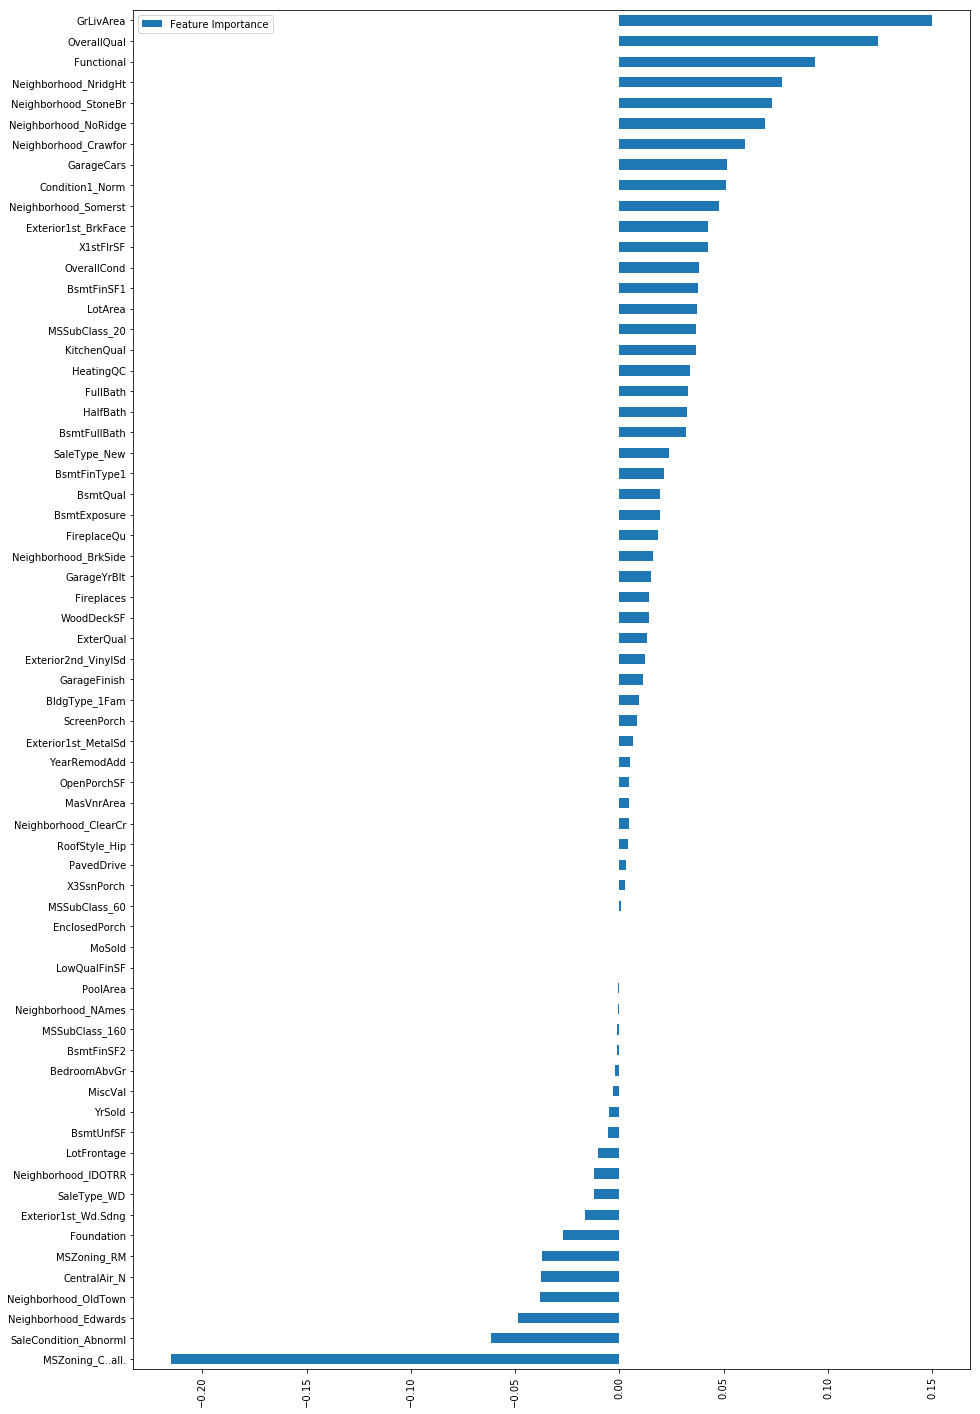

In [40]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

# PCA

In [23]:
log_y = pd.DataFrame(log_y)
pca = PCA(n_components=50,svd_solver='full')

In [24]:
trans_data = pca.fit_transform(X_scaled)

## PCA dimension reduction to 50 components on test data set

In [55]:
trans_test_data = pca.fit_transform(test_data_scaled)

In [25]:
np.sum(pca.explained_variance_ratio_)

0.9460617547124897

In [26]:
pca.explained_variance_

array([9.08868539, 4.42095343, 3.94857005, 3.03333435, 2.19472612,
       1.84416081, 1.59276769, 1.50869245, 1.28315623, 1.13605338,
       1.10165973, 0.90168077, 0.83577017, 0.68729985, 0.65558985,
       0.6190079 , 0.58736618, 0.54952937, 0.50685228, 0.45381759,
       0.43051693, 0.42499406, 0.39415432, 0.34645139, 0.33348456,
       0.31986782, 0.30500725, 0.2800877 , 0.26915219, 0.25826588,
       0.25516692, 0.23734106, 0.22642059, 0.21000487, 0.20241004,
       0.19785132, 0.18995101, 0.18856745, 0.18140966, 0.17827392,
       0.17427975, 0.15292576, 0.14817617, 0.14032079, 0.13505911,
       0.13351304, 0.12512801, 0.12014042, 0.1112869 , 0.10844563])

In [27]:
cumsum = np.cumsum(pca.explained_variance_)
np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)

(array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)

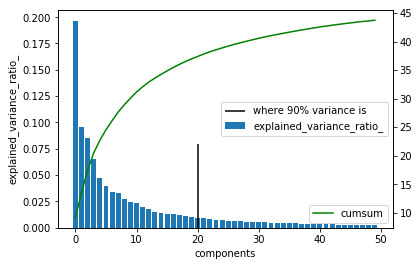

In [28]:
fig, ax1 = plt.subplots()
ax1.bar(range(0,50),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,50),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0]
ax1.vlines(position,0,0.08,label='where 90% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

# methodologies

## xgboost

In [29]:
xgboost = XGBRegressor()

In [56]:
xgboost.fit(trans_data,log_y)
pred = xgboost.predict(trans_test_data)
# mean_squared_error(log_y, pred)
# rmse = np.sqrt(mean_squared_error(log_y, pred))
# rmse

[11:38:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [89]:
test_sale_price = np.exp(pred)

In [91]:
test_sale_price_csv = pd.DataFrame(data = test_sale_price,columns = ['SalePrice'],index = range(1461,2920))
test_sale_price_csv.index.name = 'Id'

In [92]:
test_sale_price_csv.head(5)

,SalePrice
Id,
1461,139214.468750
1462,184928.875000
1463,200383.968750
1464,206120.953125
1465,165950.125000


In [93]:
test_sale_price_csv.to_csv('./test_sale_price_csv.csv',index = True)